In [1]:
# Imports
import pyinputplus as pyip
import matplotlib.pyplot as plt
import string
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Read in training dataset for modeling
TM_2021_filepath = 'https://raw.githubusercontent.com/sr2cute702/C964sr/main/TM_2021.csv'
# x from train dataset features
x = pd.read_csv(TM_2021_filepath)
# y from train dataset output
y = x['Max_Consumer_VAT_Price']

# Table with a Descriptive Overview of the Dataset

In [4]:
# Whitegrid style for better visual contrast
sns.set(style="whitegrid")
## Dataset Features Overview
# Describe numeric features in train dataset
x.describe()

,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price,Year
count,24139.000000,2.413900e+04,2.413900e+04,2.413900e+04,24139.000000
mean,33.712208,2.106401e+03,2.369759e+03,2.774231e+03,2016.795600
std,79.666244,5.354758e+04,5.891577e+04,6.893189e+04,3.010253
min,0.900000,1.512900e+00,2.072673e+00,2.425027e+00,2012.000000
25%,5.000000,2.334000e+01,3.197922e+01,3.741432e+01,2014.000000
50%,28.000000,8.188040e+01,1.101300e+02,1.289000e+02,2017.000000
75%,30.000000,4.286040e+02,5.036097e+02,5.892233e+02,2019.000000
max,5000.000000,7.758410e+06,8.534252e+06,9.985074e+06,2021.000000


### Description of the Max_Consumer_VAT_Price Distribution

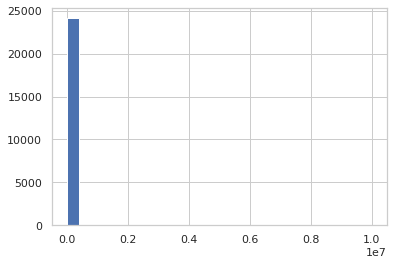

In [6]:
# Display train dataset distribution of Max_Consumer_VAT_Price
plt.hist(y, bins = 25);

### Description of the Normalized Max Consumer VAT Price Distribution

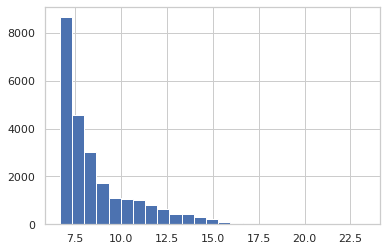

In [8]:
# Normalize train dataset distribution of Max_Consumer_VAT_Price
offset_log = 100
plt.hist(np.log2(y + offset_log), bins = 25);

### Description of Feature Correlation Heatmap

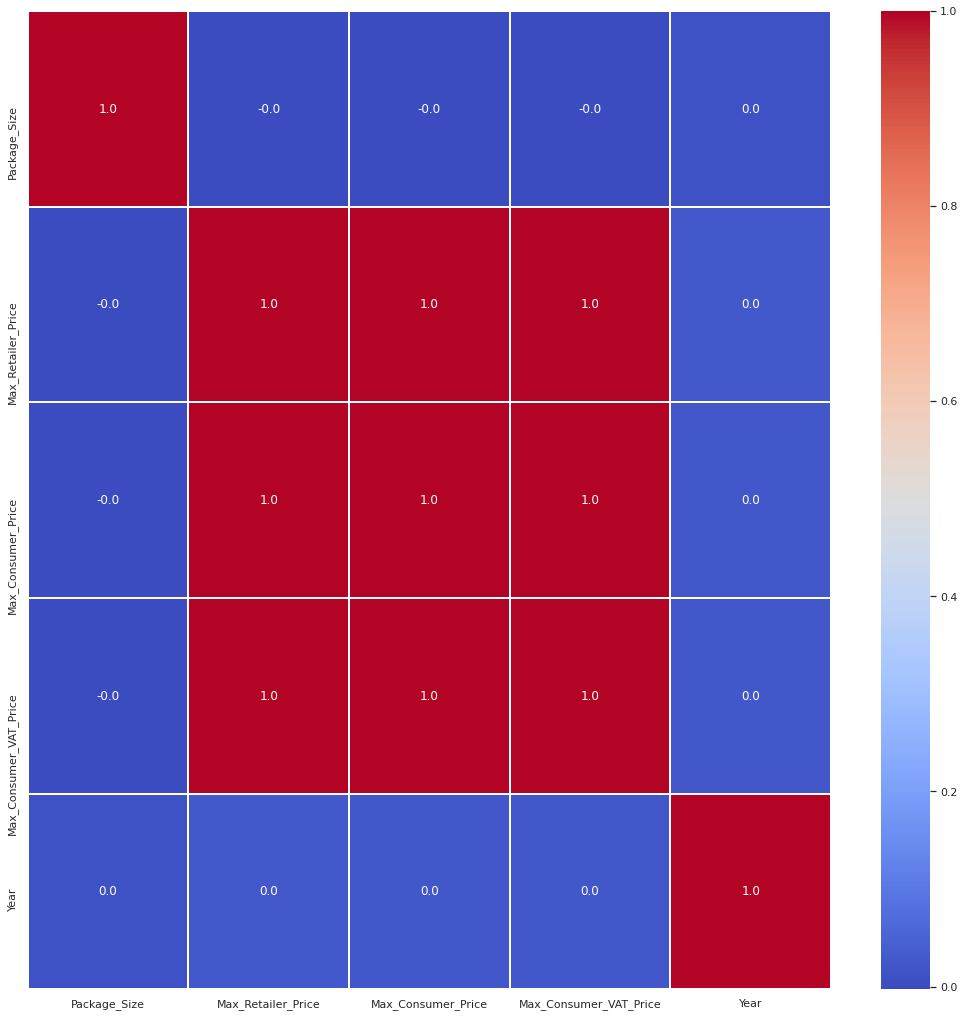

In [10]:
# Display heatmap of variable intercorrelations to aid in regressor selection for target variable
plt.figure(figsize = (18, 18))
train_corr = x.corr()
sns.heatmap(train_corr, cmap = "coolwarm", annot=True, fmt='.1f', linewidths = 0.05);

### For regressor inclusion, we use a .55 correlation with Max Consumer VAT Price, with the following features:

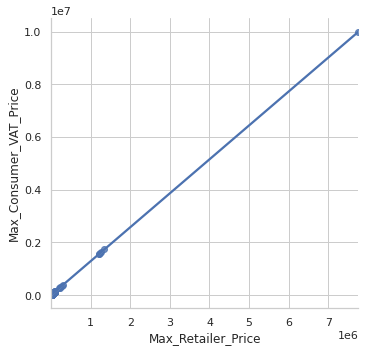

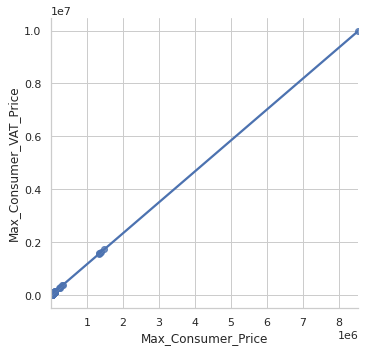

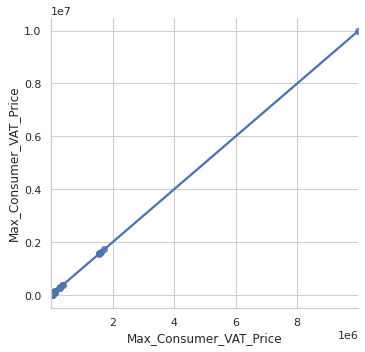

In [12]:
# From the above heatmap, we select a correlation of .55 with Max_Consumer_VAT_Price as significant enough to warrant regression inclusion
sig_corr = train_corr.index[train_corr['Max_Consumer_VAT_Price'] >= .55]
features = []
for reg in sig_corr:
    features.append(reg)
    
# Plot relation between features and Max_Consumer_VAT_Price
for reg in features:
    sns.lmplot(x = reg, y = 'Max_Consumer_VAT_Price', data = x)

In [13]:
# Drop outliers
x = x.drop(x['Max_Retailer_Price'][x['Max_Retailer_Price'] > 9000 ].index)
x = x.drop(x['Max_Consumer_Price'][x['Max_Consumer_Price'] > 9000 ].index)
# Update output
y = x['Max_Consumer_VAT_Price']
# Significant regressors
sig_x = x[[ 'Max_Retailer_Price', 'Max_Consumer_Price' ]]
feat_labels = ['Max_Retailer_Price', 'Max_Consumer_Price']
# Split the data into testing and training
x_train, x_test, y_train, y_test = train_test_split(sig_x, y, test_size=0.5, random_state=0)
# Create random forest classifier
regressor = RandomForestRegressor(n_estimators=150, random_state=42)
# Clean NaN
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
# Train classifier
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [14]:
# Calculate_prediction takes in a series of widget harvested inputs and provides them for regression analysis, producing
# through regression analysis a Max_Consumer_VAT_Price prediction from the dataset 
def calculate_prediction(Max_Retailer_Price, Max_Consumer_Price):
   # Predict with input
    predicted_price = regressor.predict([[
        Max_Retailer_Price.value, 
        Max_Consumer_Price.value]])
    return predicted_price

### Please input the medication's values and then click "Calculate":

In [16]:
# Widget sliders collect input and are passed to calculate_prediction function with button press
Max_Retailer_Price = widgets.IntSlider(min=0, max=900, step=1, description='Max Retail Price')
#display(Max_Retailer_Price)
Max_Consumer_Price = widgets.IntSlider(min=0, max=900, step=1, description='Max Consumer Price')
#display(Max_Consumer_Price)
widget_box = widgets.VBox([Max_Retailer_Price, Max_Consumer_Price])
# List of widget box children for tab
children = [widget_box]
# Initialize tab and set children
tab = widgets.Tab()
tab.children = children
# Box title
tab.set_title(0, 'Medication Values')
tab

In [17]:
def on_button_clicked(_):
    # Link function with output
    pred = calculate_prediction(Max_Retailer_Price, Max_Consumer_Price)
    # what happens when we press the button
    with out:
        out.clear_output()
        print("--Prediction--")
        print("Our model predicts approximately ", pred, "dollars for the medication with these attributes.")
        print("--Error Analysis--")
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_train))
    return

# calculate_prediction execution button harvest input from sliders
calc_button = widgets.Button(description='Calculate')
out = widgets.Output()

# Link button and function together using button method
calc_button.on_click(on_button_clicked)
# Display button and output together
widgets.VBox([calc_button,out])